 #     Проект : Исследование причин низкой окупаемости развлекательного приложения Procrastinate Pro + 

 ##            Исходные данные 

Проблема: последние несколько месяцев компания терпит убытки из-за огромных вложений в рекламу 

Цель исследования: разобраться в причинах убытков и помочь компании выйти в плюс

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

  * лог сервера с данными об их посещениях,
  * выгрузка их покупок за этот период,
  * рекламные расходы.
  
Предстоит изучить:

   * откуда приходят пользователи и какими устройствами они пользуются,
   * сколько стоит привлечение пользователей из различных рекламных каналов;
   * сколько денег приносит каждый клиент,
   * когда расходы на привлечение клиента окупаются,
   * какие факторы мешают привлечению клиентов. 
   
   
   

 ##               Описание данных 

  Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта,
       orders_info_short.csv — информацию о заказах, 
       costs_info_short.csv — информацию о расходах на рекламу.

  Структура visits_info_short.csv:

   * User Id — уникальный идентификатор пользователя,
   * Region — страна пользователя,
   * Device — тип устройства пользователя,
   * Channel — идентификатор источника перехода,
   * Session Start — дата и время начала сессии,
   * Session End — дата и время окончания сессии.
    
   Структура orders_info_short.csv:

   * User Id — уникальный идентификатор пользователя,
   * Event Dt — дата и время покупки,
   * Revenue — сумма заказа. 
   
   Структура costs_info_short.csv:

   * dt — дата проведения рекламной кампании,
   * Channel — идентификатор рекламного источника,
   * costs — расходы на эту кампанию

###  Ход исследования содержит следующие шаги: 

1) Загрузка данных и подготовка их к анализу
2) Задать  функции для расчёта и анализа LTV, ROI, удержания и конверсии
3) Исследовательский анализ данных 
4) Маркетинг 
5) Оценка окупаемости рекламы
6) Общие выводы 


##   1 Шаг 1. Загрузка данных и подготовка их к анализу 

 Загрузим библиотеки, которые будут необходимы для работы 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
from datetime import datetime, timedelta


Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
# Применим конструкцию try-except и сохраним файлы о визитах, заказах и рекламных расходах.

server_path = '/datasets/visits_info_short.csv'         

local_path  = 'C:\\Users\\user\\Downloads\\visits_info_short.csv'
try:  
    df_visits = pd.read_csv(server_path)
except: 
    df_visits = pd.read_csv(local_path) 

server_path = '/datasets/orders_info_short.csv'     

local_path  = 'C:\\Users\\user\\Downloads\\orders_info_short.csv'

try:  
    df_orders = pd.read_csv(server_path)
except: 
    df_orders = pd.read_csv(local_path)

server_path = '/datasets/costs_info_short.csv'

local_path  = 'C:\\Users\\user\\Downloads\\costs_info_short.csv'

try:  
    df_costs = pd.read_csv(server_path)
except: 
    df_costs = pd.read_csv(local_path)


 ## 2 1.1 Изучим данные и выполним предобработку. Ответим на вопрос : ''Есть ли в данных пропуски и дубликаты?''

    Изучим общую информацию о каждом датафрейме 

In [3]:
# Изучим общую информацию о посещениях сайта. Выведем первые пять строк датафрейма df_visits
df_visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# Выведем последние пять строк датафрейма df_visits
df_visits.tail()

,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


In [5]:
# Выведем случайным образом 10 строк датафрейма df_visits

df_visits.sample(10)

,User Id,Region,Device,Channel,Session Start,Session End
234625,270809247996,UK,PC,organic,2019-06-26 18:26:52,2019-06-26 18:31:51
172281,405125405962,United States,Android,MediaTornado,2019-10-04 10:20:10,2019-10-04 10:25:39
149373,834886462972,United States,iPhone,FaceBoom,2019-09-18 07:37:10,2019-09-18 08:01:26
133873,636376511325,United States,PC,FaceBoom,2019-09-04 05:30:51,2019-09-04 06:11:57
274112,630196321328,Germany,Android,organic,2019-09-04 22:54:30,2019-09-05 00:12:11
48149,178106892613,United States,iPhone,organic,2019-06-20 19:10:25,2019-06-20 22:13:02
146990,102792940611,United States,iPhone,TipTop,2019-09-16 03:11:25,2019-09-16 03:34:40
202632,622997219610,United States,iPhone,organic,2019-10-26 09:21:54,2019-10-26 09:58:39
131454,652076898417,United States,PC,FaceBoom,2019-09-02 10:00:08,2019-09-02 10:07:51
288704,647778624544,UK,Mac,organic,2019-09-28 23:56:41,2019-09-28 23:56:49


In [6]:
# Посчитаем количество строк в датафрейме

len(df_visits)

309901

In [7]:
# Приведем столбцы к нижнему регистру, для столбцов 'Session Start' и 'Session End' применим "змеиный регистр" 

df_visits = df_visits.rename(columns ={'User Id': 'user_id', 'Region' : 'region', 'Device' : 'device', 
                            'Channel': 'channel', 'Session Start': 'session_start', 'Session End' : 'session_end'})


In [8]:
# Изучим общую информацию о df_visits c помощью метода info() 
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


    В таблице df_users 6 столбцов и 309901 строка. Общий объем данных в датасете составил 14.2 MB. Для столбца user_id указан целочисленный тип данных Int. В остальных столбцах тип данных object. Для некоторых столбцов поменяем тип данных на datetime. Это столбцы 'session_start' и 'session_end', в которых хранится дата и время начала и окончания сессии соответственно.

In [9]:
# Преобразование данных о  времени
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])


In [10]:
# Проверка на изменение типа данных
df_visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

Столбцы session_start и session_end успешно приведены к нужному типу данных

In [11]:
# Проверим датафрейм на наличие пропусков. Воспользуемся методом isna().sum()
df_visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

В датафрейме нет пропущенных значений. Можно двигаться дальше.

In [12]:
# Осуществим проверку датафрейма df_users на наличие явных дубликатов, если они имеются, то удалим их.
df_visits.duplicated().sum()

0

Дубликатов не найдено. Рассмотрим следующий датафрейм df_orders

In [13]:
# Изучим общую информацию о заказах. Выведем первые пять строк датафрейма df_orders
df_orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [14]:
# Выведем последние пять строк датафрейма с помощью метода tail()
df_orders.tail()

,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


In [15]:
# Выведем случайным образом 10 строк датафрейма 
df_orders.sample(10)

,User Id,Event Dt,Revenue
2000,578819302034,2019-05-31 11:29:46,4.99
36946,954287642922,2019-09-29 14:08:59,4.99
37033,665134287950,2019-09-30 23:55:57,4.99
12681,489084506771,2019-08-16 00:32:17,4.99
35374,40444774563,2019-09-11 21:51:20,4.99
12542,223264160952,2019-08-15 13:05:23,4.99
4846,30716027791,2019-06-25 13:59:41,4.99
7486,519135940288,2019-07-12 08:05:11,4.99
10468,376569311203,2019-08-02 15:06:08,4.99
30372,143648388449,2019-07-03 18:51:53,4.99


In [16]:
# Посчитаем количество строк в датафрейме
len(df_orders)

40212

In [17]:
# Приведем названия столбцов к нижнему регистру и к "змеиному регистру". Воспользуемся методом rename().

df_orders = df_orders.rename(columns ={'User Id': 'user_id', 'Event Dt' : 'event_dt', 'Revenue': 'revenue'})

In [18]:
# Изучим общую информацию о датафрейме df_orders и проверим наши преобразования
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Преобразование названий столбцов прошло успешно. В таблице всего 3 столбца и 40212 строк. Общий объем данных в датасете составил 942.6 KB. Для столбца user_id указан целочисленный тип данных int64, для столбца revenue вещественный тип данных float64 . Столбец event_dt принадлежит к типу данных object. Это неправильный тип данных, ведь столбец хранит дату и время покупки. Поменяем его на datetime.

In [19]:
# Преобразуем данные о дате и времени
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])

In [20]:
# Проверим тип данных после преобразований 
df_orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [21]:
# Проверим таблицу df_orders на наличие пропущенных значений
df_orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [22]:
# Проверим таблицу df_orders на наличие явных дубликатов
df_orders.duplicated().sum()


0

Дубликатов не найдено. Перейдем к следующей таблице df_costs


In [23]:
# Изучим общую информацию о расходах на рекламу. Выведем первые пять строк таблицы 
df_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [24]:
# Выведем последние пять строк таблицы df_costs 
df_costs.tail()

,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


In [25]:
# Выведем 10 случайных строк датафрейма с помощью метода sample 
df_costs.sample(10)

,dt,Channel,costs
239,2019-06-29,MediaTornado,5.520
119,2019-08-28,FaceBoom,191.400
1586,2019-09-24,WahooNetBanner,34.200
820,2019-08-09,YRabbit,4.620
455,2019-08-04,RocketSuperAds,10.465
1145,2019-07-05,LeapBob,12.390
623,2019-07-23,TipTop,202.800
1421,2019-10-09,OppleCreativeMedia,12.250
369,2019-05-10,RocketSuperAds,22.230
665,2019-09-03,TipTop,312.000


In [26]:
# Посчитаем количество строк в датафрейме df_costs 
len(df_costs)

1800

In [27]:
# Првиедем столбец Channel нижнему регистру с помощью метода rename
df_costs = df_costs.rename(columns={'Channel':'channel'}) 
df_costs.sample()

,dt,channel,costs
432,2019-07-12,RocketSuperAds,6.37


In [28]:
# Изучим общую информацию о датафрейме df_costs
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


      В таблице всего 3 столбца и 1800 строк. Общий объем данных составляет 42.3 КB. Видно, что для столбца dt указан тип данных object. Это ошибка. В столбце dt указывается дата проведения рекламной компании, поменяем тип данных на datetime. Для столбцов channel и costs указаны верные типы данных object и float64 соответственно.

In [29]:
# Преобразуем данные о дате 
df_costs['dt'] = pd.to_datetime(df_costs['dt']).dt.date

In [30]:
# Проверим изменился ли тип данных для dt
df_costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

In [31]:
# Проверим таблицу df_costs на наличие пропущенных значений 
df_costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [32]:
# Проверим датасет df_costs на наличие явных дубликатов
df_costs.duplicated().sum()

0

В таблице отсутствуют дубликаты 

    Вывод по 1 шагу исследования: 
       По итогам первичного знакомства с данными и их подготовке была проведена работа по выгрузке данных, изучена общая информация о трех датафреймах(df_visits, df_orders, df_costs). Там, где было необходимо, поменяли тип данных для нужных столбцов. Названия всех столбцов 3 таблиц были приведены к нижнему регистру. В ходе проверки пропущенные значения и явные дубликаты не были обнаружены в каждом из трех датафреймов. Перейдем к следующему шагу исследования 
 

## 3 Шаг 2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии

Во втором шаге исследования нам понадобятся функции для вычисления значений метрик: 
  * get_profiles() — для создания профилей пользователей,
  * get_retention() — для подсчёта Retention Rate,
  * get_conversion() — для подсчёта конверсии,
  * get_ltv() — для подсчёта LTV.
 
 Также нам понадобятся функции для построения графиков: 

  * filter_data() — для сглаживания данных,
  * plot_retention() — для построения графика Retention Rate,
  * plot_conversion() — для построения графика конверсии,
  * plot_ltv_roi — для визуализации LTV и ROI. 

Напишем функцию для создания пользовательских профилей get_profiles

In [33]:
def get_profiles(sessions, orders, ad_costs): 
     
        # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')  
     # добавляем признак платящих пользователей
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

     
      # считаем количество уникальных пользователей
      # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
     # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
                
     # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

     # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

      # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles # возвращаем профили с CAC

Напишем функцию для расчета коэффициента удержания get_retention()
Ее аргументы: 
    
  *  profiles — профили пользователей,
  *  sessions — сессии
  *  observation_date — момент анализа,
  *  horizon_days — горизонт анализа в днях,
  *  ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.


In [34]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


Напишем функцию для расчета конверсии get_conversion()


In [35]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


Напишем функцию для расчета LTV и ROI get_ltv()

In [36]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days= horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)
    

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [37]:
# функция для сглаживания датафрейма
def filter_data(df, window):
# для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [38]:
# функция для визуализации удержания 

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


In [39]:
# функция для визуализации конверсии 

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [40]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

         Вывод по 2 шагу исследования: функции для расчета и анализа LTV и ROI get_ltv(), удержания get_retention() и конверсии get_conversion() заданы.

## 4 Шаг 3. Исследовательский анализ данных 

### 5 3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

 Создание профилей пользователей. Воспользуемся для создания функцией get_profiles().

In [41]:
# Получаем профили пользователей , выведем первые 10 строк 

profiles = get_profiles(df_visits, df_orders, df_costs) 
profiles.head(10)



,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-09 17:29:23,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-16 11:56:00,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-11 19:18:43,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-11 21:13:47,False,0.250435


In [42]:

print('Количество профилей', len(profiles))

Количество профилей 150008


Таким образом, мы получили 150008 уникальных пользователей. Найдем максимальную и минимальную дату привлечения пользователей.

In [43]:
print('Минимальная дата привлечения пользователей', profiles['dt'].min())

Минимальная дата привлечения пользователей 2019-05-01


In [44]:
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Максимальная дата привлечения пользователей 2019-10-27


### 6 3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

   Сделаем группировку профилей пользователей по регионам. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [45]:
# выясним из каких стран приходят пользователи в приложение 
print(profiles.region.value_counts())

United States    100002
UK                17575
France            17450
Germany           14981
Name: region, dtype: int64


In [46]:
users_region = (profiles.groupby('region')['user_id', 'payer'].agg({'user_id': 'count', 'payer': 'sum'}).reset_index())

users_region['percentage by region, %'] = round(users_region['user_id'] / users_region['user_id'].sum() * 100,1)
users_region['percentage by payers, %'] = round(users_region['payer'] / users_region['user_id'] * 100, 1)
users_region.sort_values(by = 'payer', ascending= False)

C:\Users\user\AppData\Local\Temp\ipykernel_14888\1769070405.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_region = (profiles.groupby('region')['user_id', 'payer'].agg({'user_id': 'count', 'payer': 'sum'}).reset_index())


,region,user_id,payer,"percentage by region, %","percentage by payers, %"
3,United States,100002,6902,66.7,6.9
2,UK,17575,700,11.7,4.0
0,France,17450,663,11.6,3.8
1,Germany,14981,616,10.0,4.1


Визуализируем получившиеся данные. 

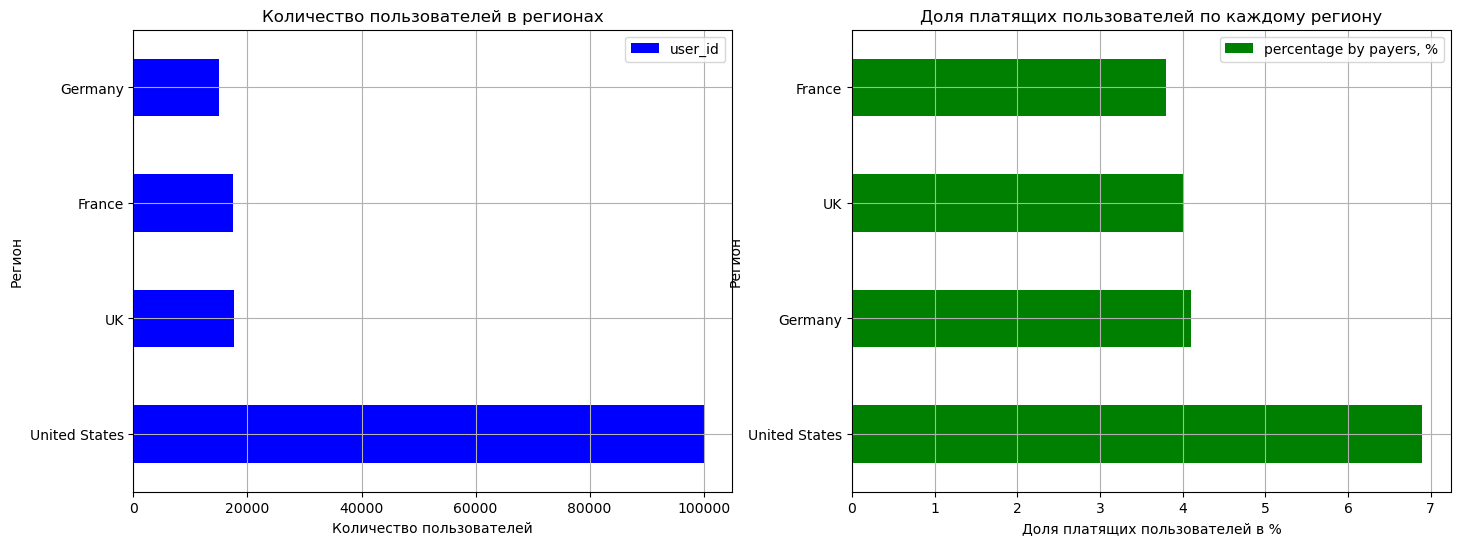

In [47]:
plt.figure(figsize = (17,6))


ax1 = plt.subplot(1,2,1)
users_region.sort_values(by = 'user_id', ascending = False).plot(kind='barh', x = 'region', y = ['user_id'], grid = True,
                         title = 'Количество пользователей в регионах', ax=ax1, color = 'b').set(ylabel = 'Регион', xlabel = 'Количество пользователей')
plt.xticks(rotation = 'horizontal')


ax2 = plt.subplot(1,2,2)
users_region.sort_values(by = ['percentage by payers, %'], ascending=False).plot(kind='barh', x = 'region', y = ['percentage by payers, %'], grid = 
                         True, title = 'Доля платящих пользователей по каждому региону', ax=ax2, color = 'g').set(ylabel = 'Регион',
                         xlabel = 'Доля платящих пользователей в %')
 
plt.show()
                         

     Как видно из графиков, лидирует по количеству пользователей США. Количество пользователей из Великобритании и Франции примерно равное. Меньше всего пользователей приложения зафиксировано в Германии. 
     Наибольшая доля платящих пользователей также находится в США(6,9 %). Остальные страны расположились рядом друг с другом. 
    В Германии доля платящих пользователей составляет 4.1 %, в Великобритании 4 %, во Франции 3.8 %. 

###  6 3.3    Узнаем , какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства. 

    Сгруппируем профили пользователей по устройствам, с которых они заходят в приложение. Узнаем какие устройства предпочитают платящие пользователи. 

In [48]:
# выясним какими устройствами пользуются клиенты
print(profiles.device.value_counts())

iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: device, dtype: int64


In [49]:
users_device = (profiles.groupby('device')['user_id', 'payer'].agg({'user_id':'count', 'payer': 'sum'}).reset_index())
users_device['percentage by device, %'] = round(users_device['user_id'] / users_device['user_id'].sum() * 100, 1)
users_device['percentage by payers, %'] = round(users_device['payer'] / users_device['user_id'] * 100, 1) 
users_device.sort_values(by='payer', ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_14888\3847338564.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_device = (profiles.groupby('device')['user_id', 'payer'].agg({'user_id':'count', 'payer': 'sum'}).reset_index())


,device,user_id,payer,"percentage by device, %","percentage by payers, %"
3,iPhone,54479,3382,36.3,6.2
0,Android,35032,2050,23.4,5.9
1,Mac,30042,1912,20.0,6.4
2,PC,30455,1537,20.3,5.0


Получили нужную таблицу. Визуализируем данные. 

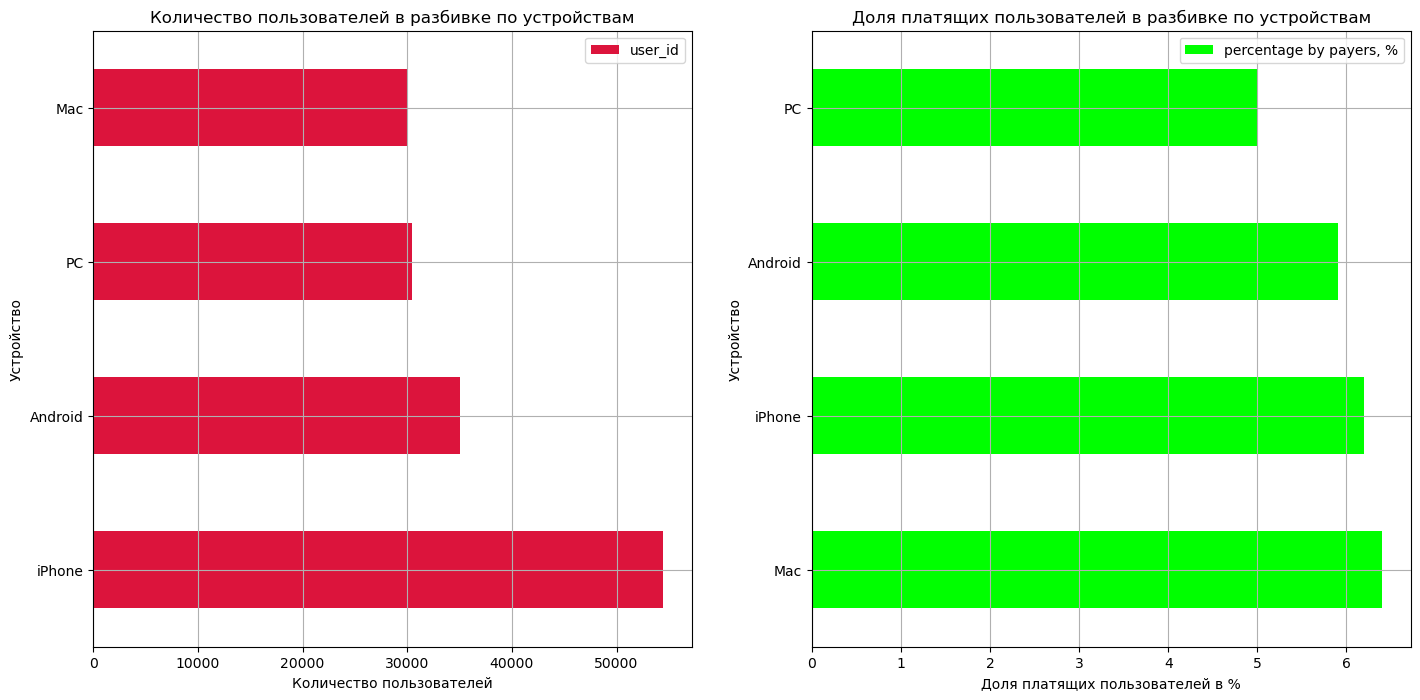

In [50]:
plt.figure(figsize=(17,8))

ax1 = plt.subplot(1,2,1)
users_device.sort_values(by = 'user_id', ascending = False).plot(kind='barh', grid = True, x = 'device', y = ['user_id'], 
                        title = 'Количество пользователей в разбивке по устройствам', ax = ax1, color = 'crimson').set(
                        xlabel = 'Количество пользователей', ylabel = 'Устройство') 

ax2 = plt.subplot(1,2,2) 
users_device.sort_values(by = ['percentage by payers, %'], ascending= False).plot(kind='barh', grid = True, x = 'device', y =['percentage by payers, %'],
                        title = 'Доля платящих пользователей в разбивке по устройствам', ax = ax2, color = 'lime').set(
                        xlabel = 'Доля платящих пользователей в %', ylabel = 'Устройство')
                                        
plt.show()

     По данным графиков можно заметить, что наибольшее количество пользователей заходит в приложение с Iphone(36.3 %), на втором месте по числу пользователей являются владельцы Android(23.4 %). Среди владельцев PC(20 %) и Mac(20.3 %)  примерно равное количество пользователей. 
     Наибольшая доля платящих пользователей среди владельцев Mac(6.4 %), далее на втором месте по доле платящих пользователей находятся владельцы Iphone(6.2 %). На третьем месте пользователи Android(5.9 %). Наименьшая доля платящих пользователей среди владельцев PC(5 %). 

### 7 3.4   Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения 

     Сгруппируем профили пользователей по каналам привлечения и посмотрим из каких рекламных источников приходят пользователи в приложение. Построим таблицу, отражающую количество пользователей и долю платящих пользователей для каждого канала привлечения. 

In [51]:
# выясним каналы привлечения пользователей 
print(profiles.channel.value_counts())

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64


In [52]:
users_channel = (profiles.groupby('channel')['user_id','payer'].agg({'user_id':'count', 'payer': 'sum'}).reset_index())
users_channel['percentage by channel,%'] = round(users_channel['user_id'] / users_channel['user_id'].sum() * 100, 1 ) 
users_channel['percentage by payers, %'] = round(users_channel['payer'] / users_channel['user_id'] * 100, 1)
users_channel.sort_values(by='payer',ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_14888\2772496232.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_channel = (profiles.groupby('channel')['user_id','payer'].agg({'user_id':'count', 'payer': 'sum'}).reset_index())


,channel,user_id,payer,"percentage by channel,%","percentage by payers, %"
1,FaceBoom,29144,3557,19.4,12.2
6,TipTop,19561,1878,13.0,9.6
10,organic,56439,1160,37.6,2.1
7,WahooNetBanner,8553,453,5.7,5.3
0,AdNonSense,3880,440,2.6,11.3
5,RocketSuperAds,4448,352,3.0,7.9
2,LeapBob,8553,262,5.7,3.1
4,OppleCreativeMedia,8605,233,5.7,2.7
9,lambdaMediaAds,2149,225,1.4,10.5
8,YRabbit,4312,165,2.9,3.8


   Получили нужную таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. Перейдем к визуализации данных.

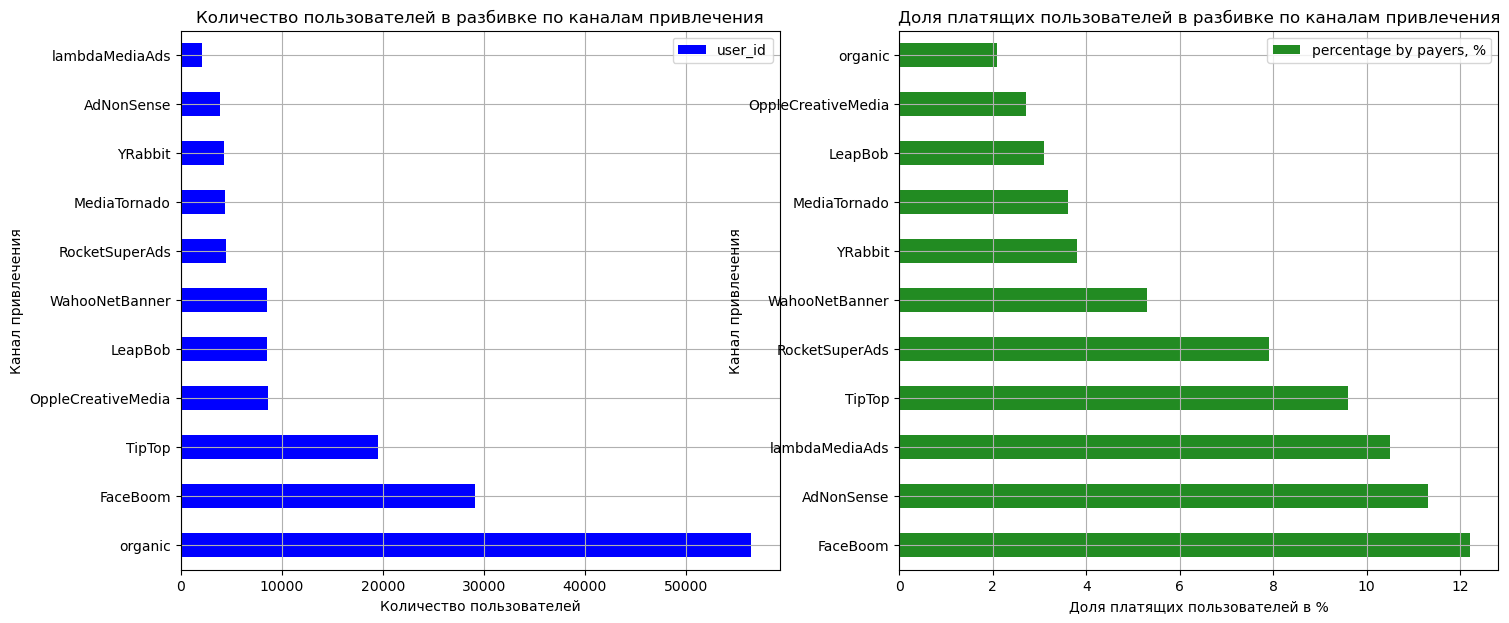

In [53]:
plt.figure(figsize=(17,7))

ax1 = plt.subplot(1,2,1) 

users_channel.sort_values(by= 'user_id', ascending = False).plot (kind='barh', grid = True, x = 'channel', y = ['user_id'], 
                          title = 'Количество пользователей в разбивке по каналам привлечения', ax = ax1, color = 'blue').set(
                          xlabel = 'Количество пользователей', ylabel = 'Канал привлечения')
  
ax2 = plt.subplot(1,2,2)

users_channel.sort_values(by=['percentage by payers, %'], ascending=False).plot(kind='barh', grid=True, x = 'channel', y = 
                          ['percentage by payers, %'], title = 'Доля платящих пользователей в разбивке по каналам привлечения', 
                          ax = ax2, color = 'forestgreen').set(xlabel = 'Доля платящих пользователей в %', ylabel = 'Канал привлечения')


plt.show()
                        

38 % от общего количества уникальных пользователей находят приложение самостоятельно(канал 'organic'). На втором месте канал FaceBoom(19.4 %), на третьем месте по количеству пользователей находится канал TipTop(13 %). Меньше всего пользователей узнают о приложении через канал lambdaMediaAds (1.4 %). 

Наибольшая доля платящих пользователей приходит через канал FaceBoom(12.2 %). В топ-3 располагаются канал AdNonSense(11.3 %) и lambdaMediaAds(10.5 %) 


Выводы по исследовательскому анализу данных: 
    
 1) Составили профили пользователей. Было обнаружено 150008 уникальных пользователей. Минимальная дата привлечения пользователей  2019-05-01. Максимальная дата привлечения пользователей 2019-10-27. 
 2) Провели группировку профилей пользователей по странам. Приложением пользуются в 4 странах: США, Великобритания, Франция,Германия. Наибольшее количество пользователей приложения в США (66.7 %). США также лидирует по доле платящих пользователей с показателем 6.9 %. Распределение среди остальных 3 стран примерно равное как по количеству пользователей, так и по доле платящих пользователей. 
 3) Сделали группировку профилей пользователей по устройствам. Приложением пользуются на 4 устройствах Iphone, Android, Mac,PC.  Выяснили, что наибольшее количество пользователей заходит в приложение с Iphone(36.7 %). Среди владельцев Android, PC и Mac приблизительно равное количество пользователей. 
 4) Сгруппировали профили пользователей по рекламным источникам. Выяснили, что пользователи заходят в приложение через такие каналы, как: organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob, WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, 
AdNonSense, lambdaMediaAds. 38 % от общего количества уникальных пользователей находят приложение самостоятельно(канал 'organic'). 
Наибольшая доля платящих пользователей приходит через канал FaceBoom (12.2 %). В топ-3 располагаются канал AdNonSense(11.3 %) и 
lambdaMediaAds(10.5 %). 

Перейдем к 4 шагу нашего исследования. 

##  8 Шаг 4. Маркетинг

### 9 4.1 Посчитаем общую сумму расходов на маркетинг

In [54]:
# посчиатем общую сумму расходов на рекламную кампанию 
round(df_costs['costs'].sum())

105497

Общая сумма расходов на рекламную кампанию в период с 2019-05-01 по 2019-10-27 составила 105497 долларов.


### 10 4.2   Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. 



In [55]:
# Посмотрим на распределение суммы расходов на рекламную кампанию по каналам привлечения 

users_costs = df_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False) 
users_costs['percentage by costs,%'] = round((users_costs['costs'] / users_costs['costs'].sum()) * 100, 1)
users_costs

,costs,"percentage by costs,%"
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


   По данным таблицы видно, что больше всего рекламных расходов было потрачено на рекламный канал TipTop - 54751.30 долларов, что составляет почти 52 % от всей суммы расходов на рекламу. Меньше всего рекламных расходов было потрачено на каналы Yrabbit(944.22 долларов) и MediaTornado(954.48 долларов).  

<Figure size 1600x700 with 0 Axes>

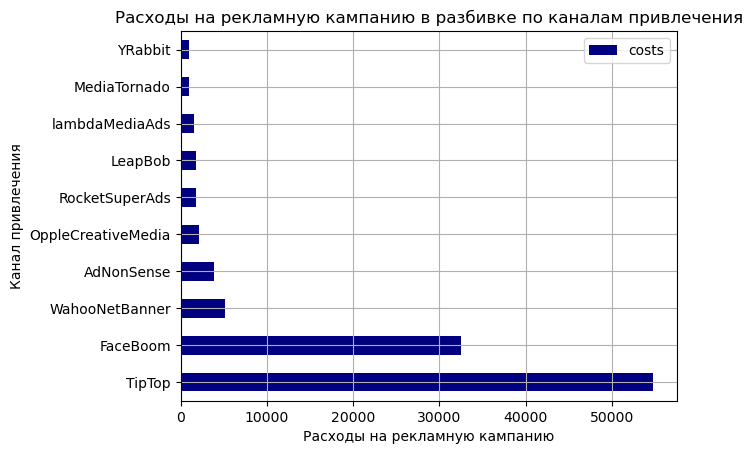

In [56]:
# Визуализируем данные 

plt.figure(figsize=(16,7))
users_costs.plot(kind='barh', grid = True, y = 'costs', color = 'navy',
                 title = 'Расходы на рекламную кампанию в разбивке по каналам привлечения').set( 
                 xlabel = 'Расходы на рекламную кампанию', ylabel = 'Канал привлечения')

plt.show()
               
                 
                

   Общая сумма расходов на рекламную кампанию в период с 2019-05-01 по 2019-10-27 составила 105497 долларов.
   По данным графика видно, что больше всего рекламных расходов было потрачено на рекламный канал TipTop - 54751.30 долларов, что составляет почти 52 % от всей суммы расходов на рекламу. Меньше всего рекламных расходов было потрачено на каналы Yrabbit(944.22 долларов) и MediaTornado(954.48 долларов).  

### 11 4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [57]:
# Добавляем в датафрейм df_costs столбец dt_month
df_costs['month'] = pd.to_datetime(df_costs['dt']).dt.month

In [58]:
# Добавляем в датафрейм df_costs столбец dt_week 
df_costs['week'] = pd.to_datetime(df_costs['dt']).dt.isocalendar().week

In [59]:
# Выведем первые пять строк df_costs
df_costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


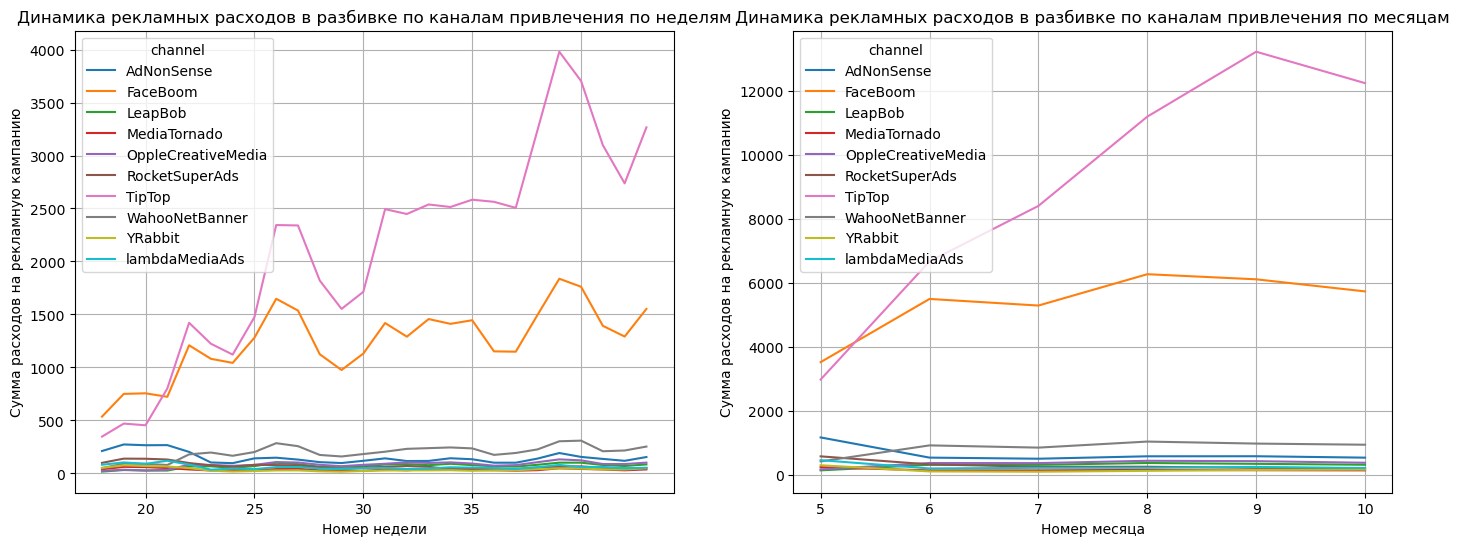

In [60]:
# Построим график динамики расходов на каналы привлечения по неделям

plt.figure(figsize=(17,6)) 

ax1 = plt.subplot(1,2,1) 

df_costs.pivot_table(index='week', values = 'costs', columns = 'channel', aggfunc='sum').plot(grid=True, ax=ax1, title= 
                     'Динамика рекламных расходов в разбивке по каналам привлечения по неделям').set(
                     xlabel = 'Номер недели', ylabel = 'Cумма расходов на рекламную кампанию') 

# Построим график динамики расходов на каналы привлечения по месяцам
ax2 = plt.subplot(1,2,2) 

df_costs.pivot_table(index='month', values = 'costs', columns = 'channel', aggfunc='sum').plot(grid=True, ax=ax2, title= 
                     'Динамика рекламных расходов в разбивке по каналам привлечения по месяцам').set(
                     xlabel = 'Номер месяца', ylabel = 'Cумма расходов на рекламную кампанию') 

plt.show()

По данным первого графика, можно заметить, что для  каналов (FaceBoom и TipTop) в динамике  наблюдается постоянный рост рекламных расходов от недели к неделе в течении исследуемого периода. Остальные каналы привлечения не проявляют никакой динамики, находясь в течении всего периода исследования на одном уровне. 

Похожая картина наблюдения заметна и на втором графике. Рекламные каналы FaceBoom и TipTop проявляют динамику роста рекламных расходов от месяца к месяцу. Для остальных рекламных источников можно заметить определенный застой на одном уровне. 

### 12 4.4  Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили  пользователей.

In [61]:
# Выведем первые 10 строк датафрейма profiles
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-09 17:29:23,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-16 11:56:00,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-11 19:18:43,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-11 21:13:47,False,0.250435


 В профиле появился новый столбец acquisition_cost со стоимостью привлечения каждого пользователя приложения Procrastinate Pro+

    Рассчитаем среднюю стоимость привлечения одного пользователя (CAC) по каналам привлечения. Сгруппируем данные по столбцу acquisition_cost в профиле пользователей.

In [62]:
# Исключим из выборки органических пользователей, то есть тех, кто приходят в приложение самостоятельно
len(profiles.query('channel != "organic"'))

93569

Видим, что всего 93569 уникальных пользователей, которые приходят в приложение через рекламные каналы

In [63]:
# Рассчитаем средний CAC по пользователям рекламных каналов без учета "органических" пользователей 
print(round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

1.13


In [64]:
mean_CAC_of_channel = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).reset_index()
print(mean_CAC_of_channel)

              channel  acquisition_cost
0              TipTop          2.799003
1            FaceBoom          1.113286
2          AdNonSense          1.008054
3      lambdaMediaAds          0.724802
4      WahooNetBanner          0.602245
5      RocketSuperAds          0.412095
6  OppleCreativeMedia          0.250000
7             YRabbit          0.218975
8        MediaTornado          0.218717
9             LeapBob          0.210172


     Выясним, каким образом меняется стоимость привлечения для каждого канала привлечения от когорты к когорте. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов - каналы привлечения, а значениями - средний CAC, и построим по ней график истории изменений. 

<Figure size 2000x1000 with 0 Axes>

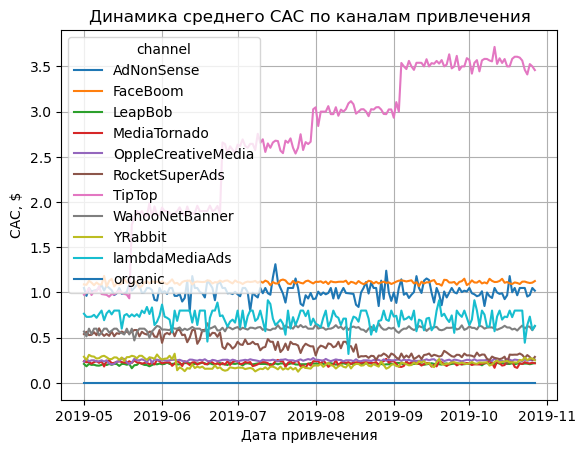

In [65]:
# строим график истории изменений CAC по каналам привлечения 

plt.figure(figsize=(20,10))

profiles.pivot_table(index='dt', columns ='channel', values = 'acquisition_cost', aggfunc = 'mean').plot( grid = True)
plt.title('Динамика среднего CAC по каналам привлечения')
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.show()

    Стоимость привлечения "органических" пользователей во всех когортах равна нулю, потому что они зашли в приложение Procrastinate Pro+ самостоятельно. Привлечение одного пользователя из рекламных каналов Leapbob, MediaTornado, Yrabbit обошлось разработчикам приложения в среднем в 22 цента. На третьем месте по среднему CAC находится рекламный канал AdNonSense. Привлечение одного пользователя там обходится в среднем в 1 доллар. Немного больше рекламных затрат потребовал канал FaceBoom. Среднее CAC - 1.11 долларов. Абсолютным лидером по средней стоимости привлечения одного пользователя оказался рекламный источник TipTop, средний CAC которого составил 2.80 долларов.

 Выводы по 4 шагу исследования: 

1) Общая сумма расходов на рекламную кампанию в период с 2019-05-01 по 2019-10-27 составила 105497 долларов. 
2) Основная доля расходов направлена на рекламный канал TipTop (51.9 %) и FaceBoom(30.8 %) от общих рекламных расходов.
3) По данным графиков можно заметить постоянный рост расходов на рекламные каналы TipTop и FaceBoom от недели к неделе и от месяца к месяцу в течении исследуемого периода, в то время как остальные каналы не проявляют признаков динамики роста или падения 
4) Средняя стоимость привлечения пользователя по каналам привлечения составила 1.13 долларов 
5) Построили график истории изменений CAC по каналам привлечения. Выяснили, что лидером по средней стоимости привлечения одного пользователя оказался рекламный источник TipTop, средний CAC которого составил 2.80 долларов.


## 13  Шаг 5. Оценка окупаемости рекламы 

### 14 5.1  Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

        Установим момент и горизонт анализа. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения

In [66]:
# определим момент анализа 
observation_date = datetime(2019,11,1).date()

# определим горизонт анализа 
horizon_days  = 14 

Не будем включать в анализ органических пользователей. Оставим только пользователей, пришедших по платным каналам. 


In [67]:
print('Количество профилей всех пользователей:', len(profiles))
profiles = profiles.query('channel != "organic"')
print('Количество профилей пользователей без учета "organic":', len(profiles))

Количество профилей всех пользователей: 150008
Количество профилей пользователей без учета "organic": 93569


После того как установили момент анализа и горизонт анализа можно приступать к анализу.

Посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

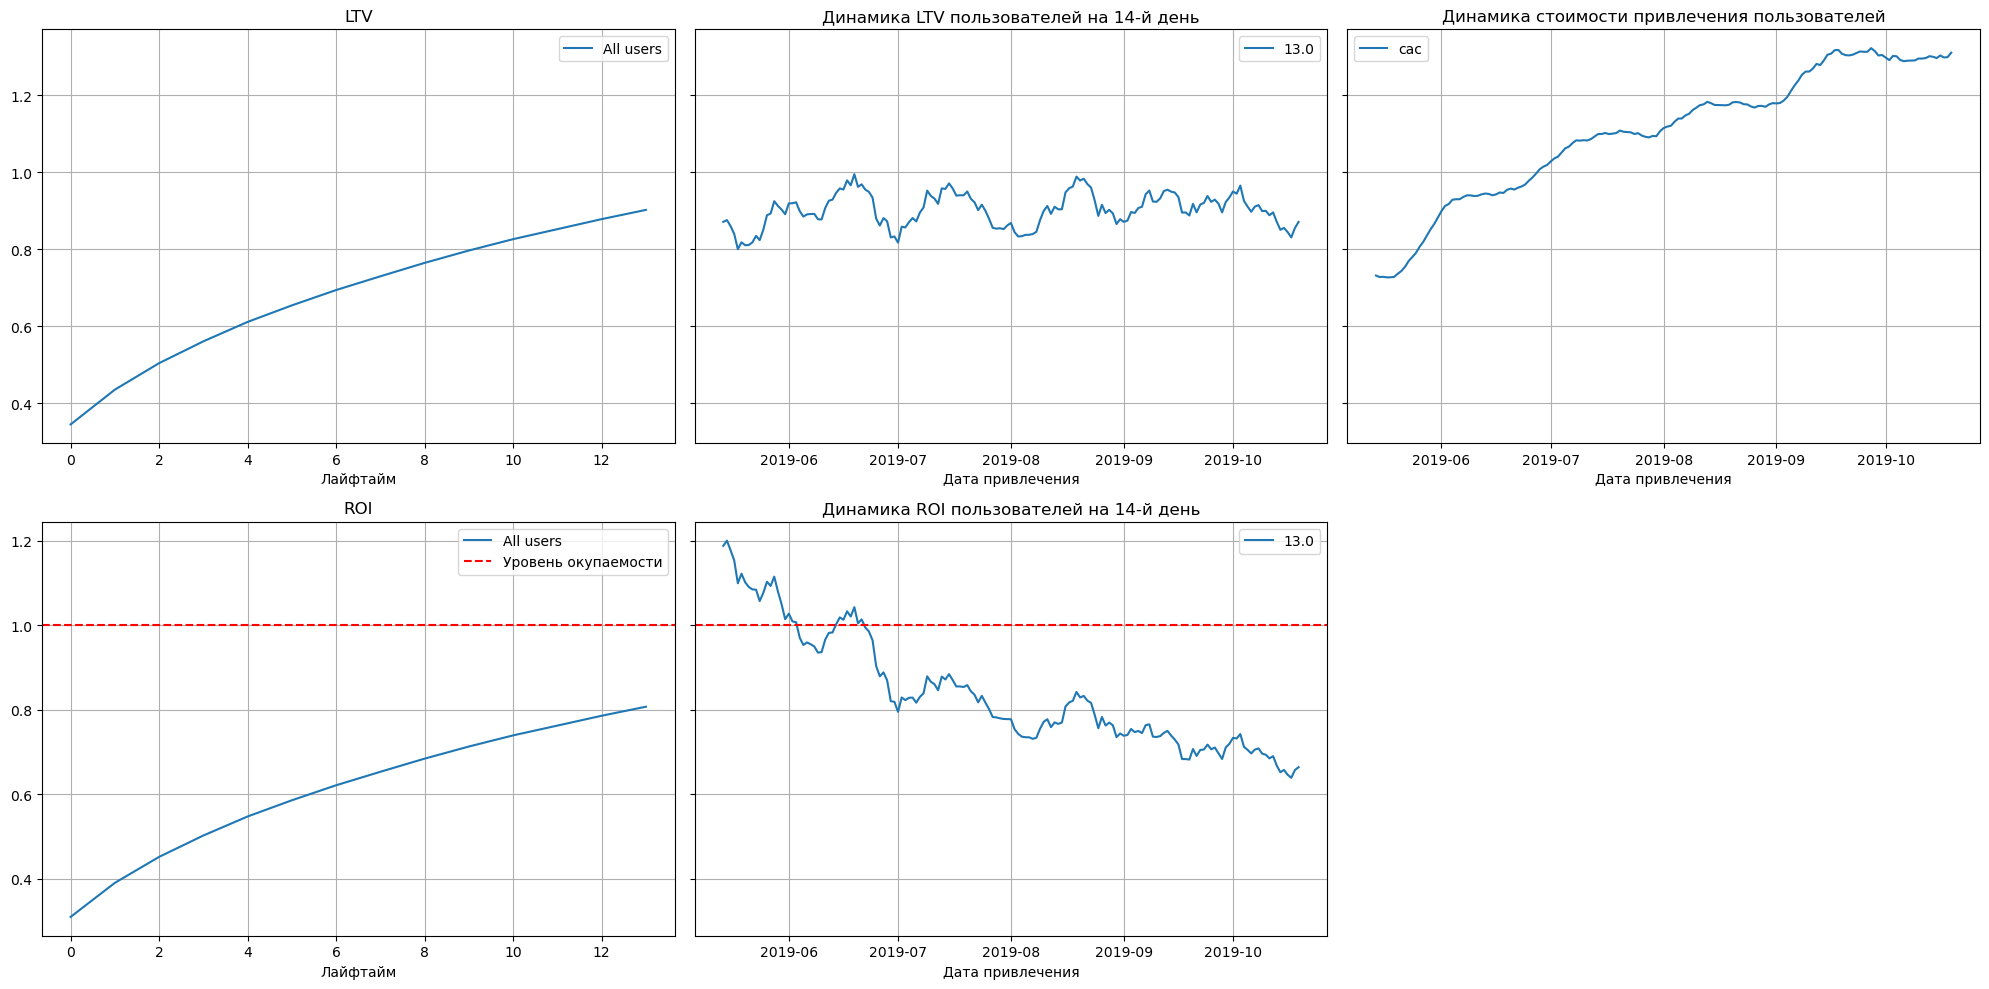

In [68]:
# считаем LTV и ROI 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, df_orders, observation_date, horizon_days)  

# строим графики 

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

По данным графикам можно сделать такие выводы: 
1) Реклама не окупается. ROI в конце периода двух недель чуть выше 80 %. 
2) CAC постоянно увеличивается 
3) Динамика LTV пользователей на 14 день стабильная 

### 15 5.2  Проверим конверсию  пользователей и динамику её изменения. Проверим удержание пользователей и динамику её изменения. Построим  и изучим графики конверсии и удержания. 

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

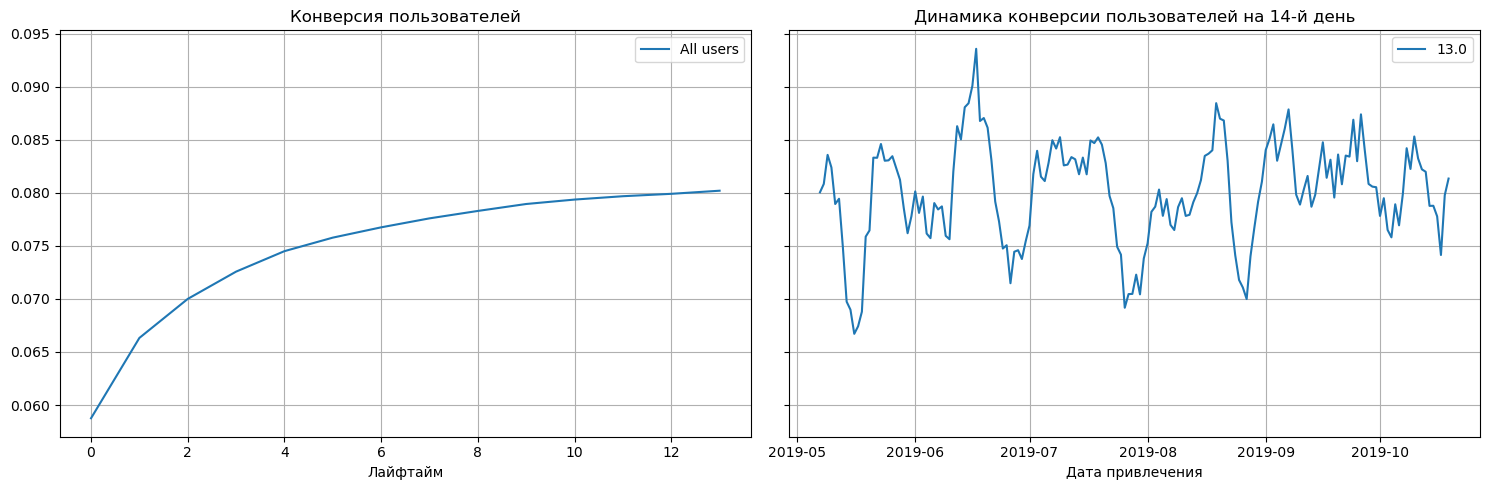

In [69]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, df_orders, observation_date, horizon_days)
# строим график визуализации конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По данным графиков  конверсия пользователей в конце второй недели дотягивает только до 80 %

Посчитаем и визуализируем удержание, вызвав функции get_retention и plot_retention().

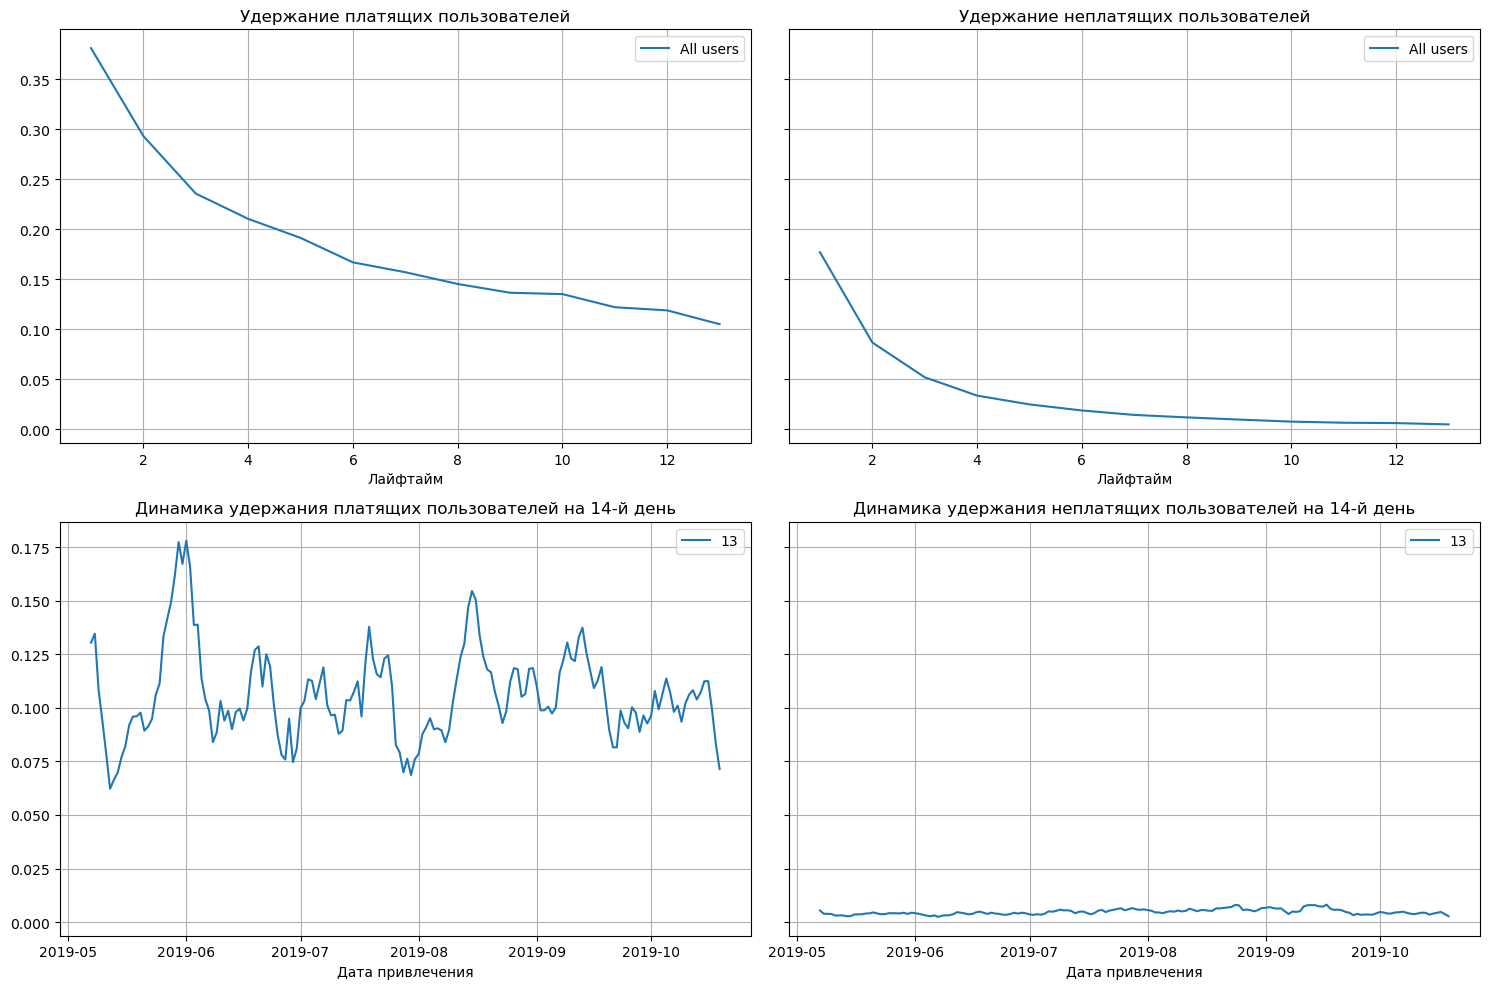

In [70]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df_visits, observation_date, horizon_days)

# строим график визуализации удержания 
plot_retention(retention_grouped, retention_history, horizon_days) 


 По данным графиков можно сделать такие выводы: 
1) Удержание платящих пользователей намного лучше, чем удержание неплатящих пользователей. В целом, этого можно было ожидать, так как платящие пользователи лояльнее относятся к продукту, чем неплатящие. 
2) Динамика удержания платящих пользователей на 14-й день также  превышает динамику неплатящих пользователей.

###  16 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


 Посмотрим на окупаемость рекламы с разбивкой по устройствам. Передадим параметру dimensions столбец device. 

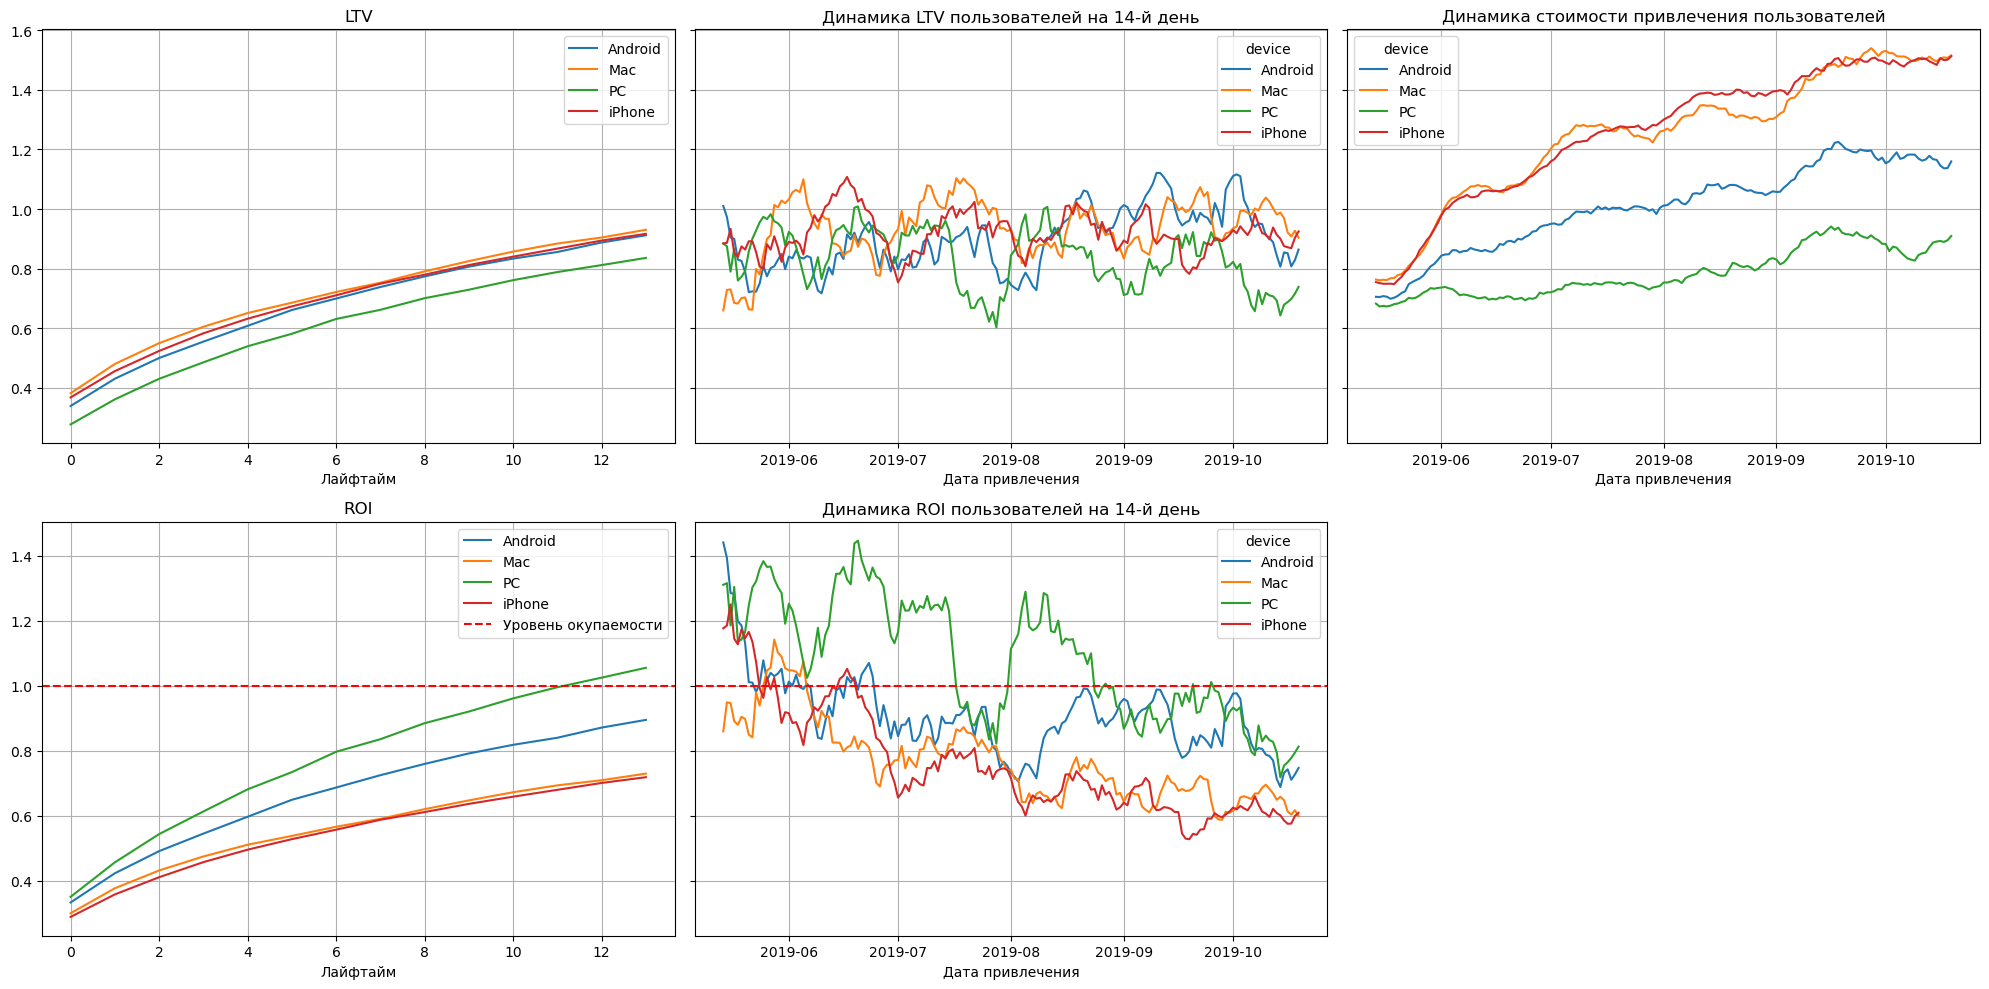

In [71]:
# смотрим окупаемость рекламы с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions = dimensions) 

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window =14)


По данным графиков можно сделать следующие выводы: 
* Незначительно превышает уровень окупаемости только PC. Остальные устройства стабильно не дотягивают до уровня окупаемости. 
* LTV стабилен для всех 4 устройств
* Динамика ROI лучше всего также у владельцев PC. 
* Стоимость привлечения пользователей растет на всех 4 устройствах, при этом владельцы Mac и Android самые 'неокупаемые'



### 17 5.4  Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


 Посмотрим на окупаемость рекламы с разбивкой по странам. Передадим параметру dimensions столбец region. 

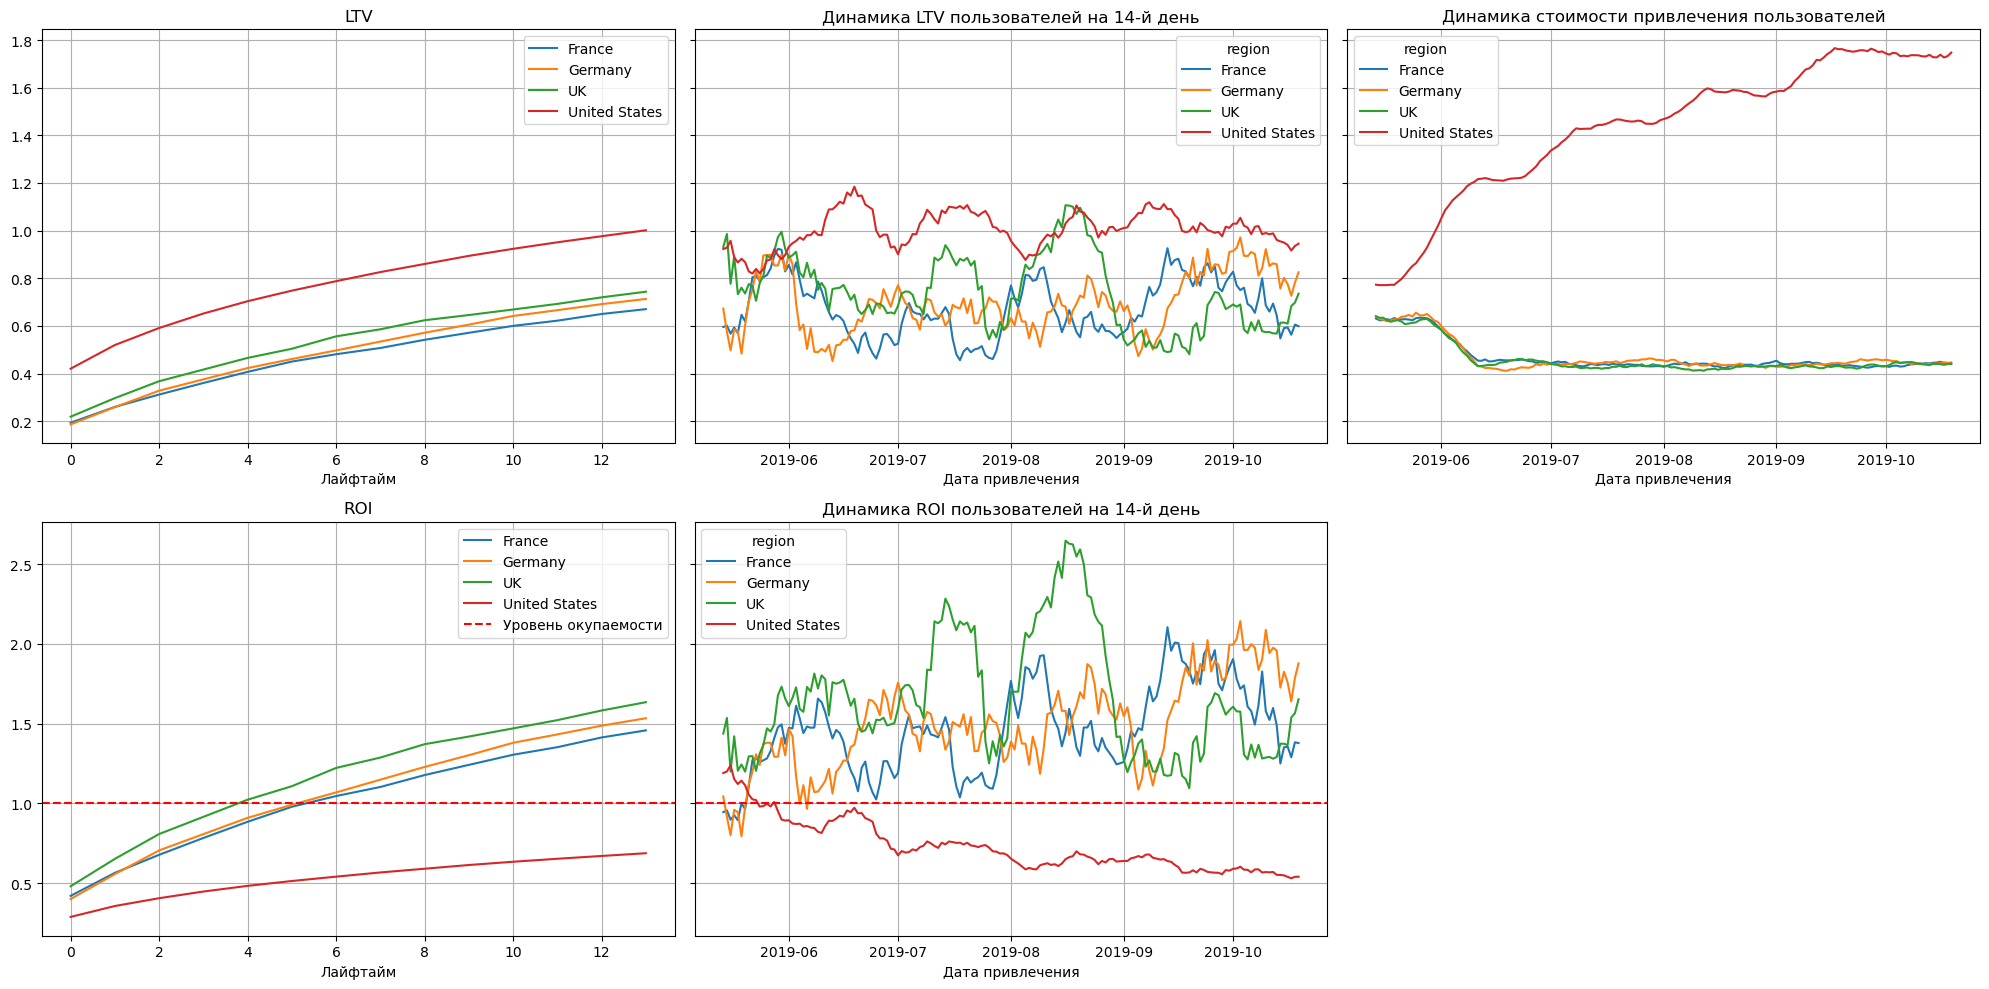

In [72]:
# смотрим окупаемость рекламы с разбивкой по странам 

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions = dimensions) 

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window =14)

По данным графиков можно сделать такие выводы: 
* LTV стабильно растет  для всех четырех стран, лучший показатель LTV у США. 
* США не дотягивает до уровня окупаемости, в то время как остальные страны заметно превысили уровень окупаемости
* Динамика ROI лучше всего у Великобритании
* Стоимость привлечения пользователей в США намного превышает CAC пользователей из Франции, Германии и Великобритании. Можно сказать, что пользователи из США практически не окупаются. 
 

###  18 5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам . Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


 Посмотрим на окупаемость рекламы с разбивкой по рекламным каналам. Передадим параметру dimensions столбец channel. 

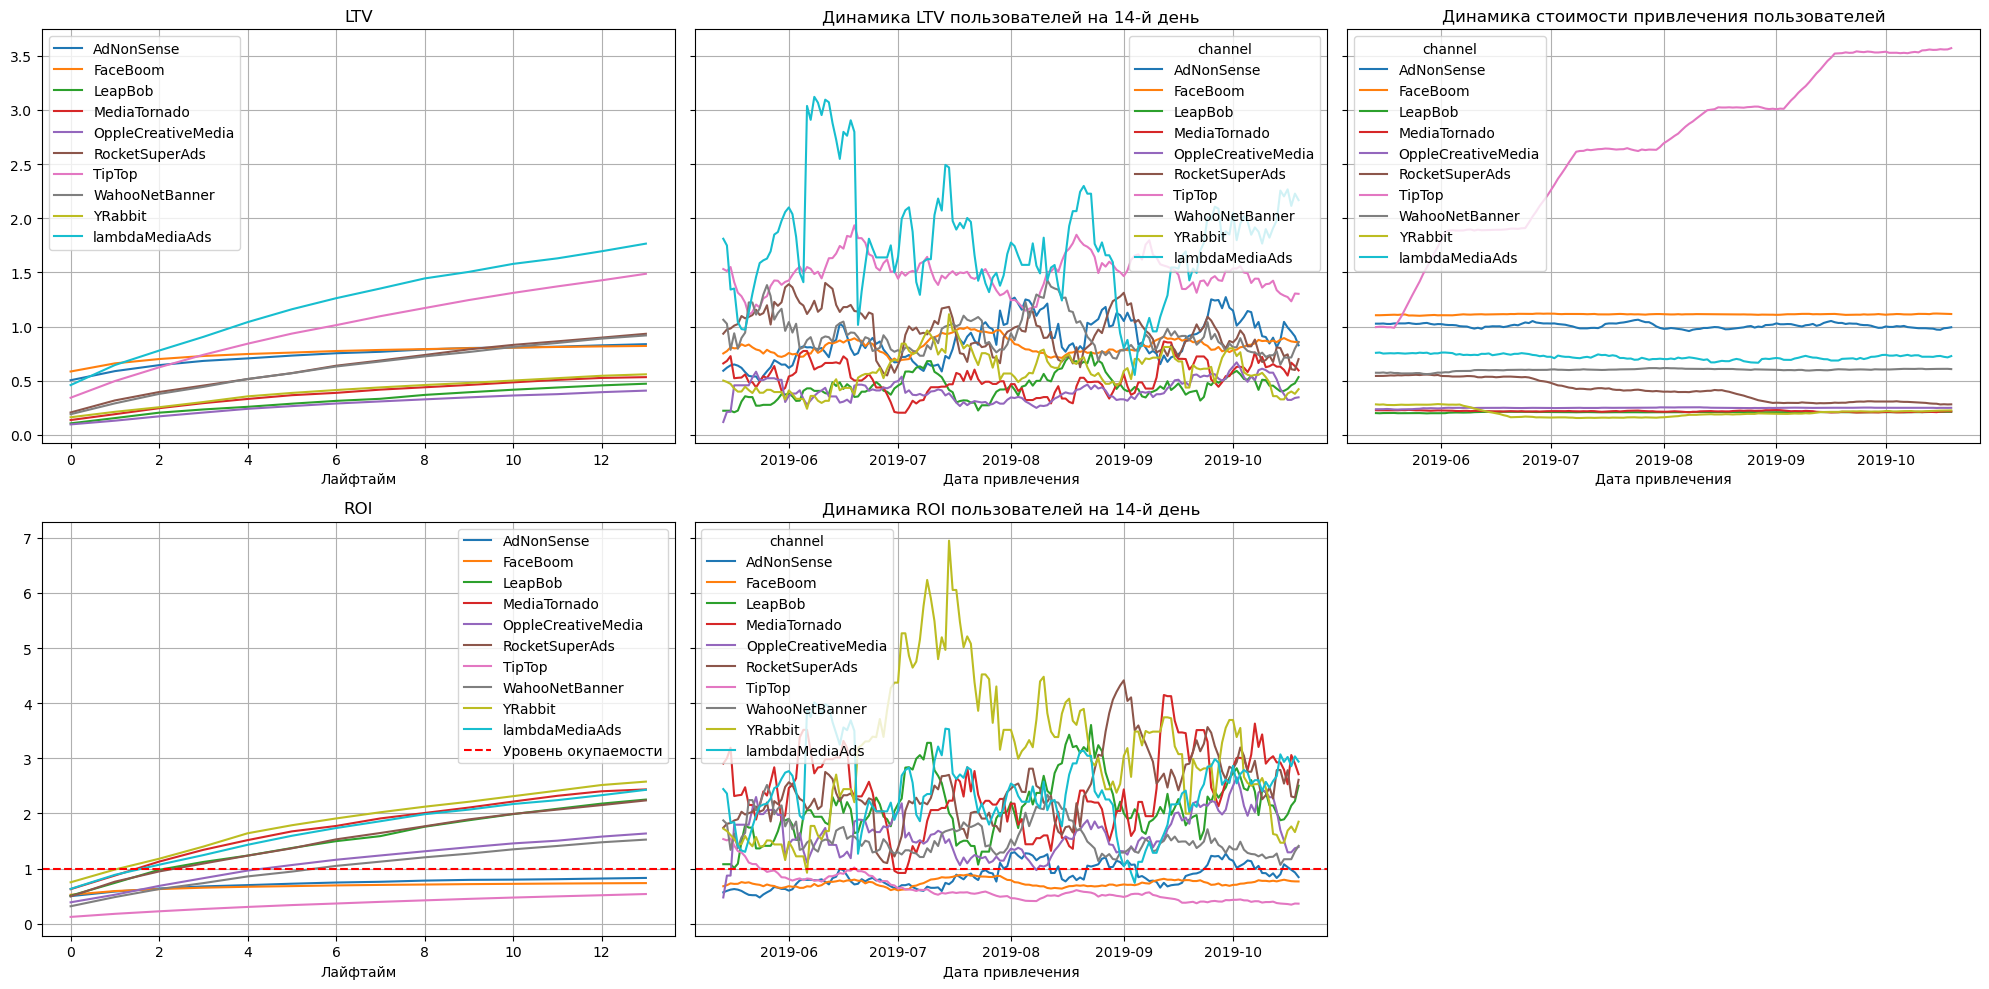

In [73]:
# смотрим окупаемость рекламы с разбивкой по рекламным каналам 

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions = dimensions) 

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window =14)

По данным графиков можно сформулировать следующие выводы: 
 * LTV в течении горизонта анализа стабильно повышается среди всех рекламных каналов. Больше всего прибыли приносят пользователи из канала lambdaMediaAds
 * Все рекламные компании в большинстве своем окупаются, но есть три рекламных канала, которые не дотягивают до уровня окупаемости: TipTop, FaceBoom, LeapBob. 
 * Стоимость привлечения пользователей из канала TipTop растет высокими темпами  по сравнению с остальными рекламными источниками. 
 * Лучшую динамику LTV пользователей показывают пользователи, перешедшие в приложение из канала lambdaMediaAds.

### 19 5.6  'Окупается ли реклама, направленная на привлечение пользователей в целом?' 

В целом можно сказать, что реклама не окупается. ROI в конце двух недель составляет всего 80 %. 



### 20 5.7 'Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?' 

    В ходе проведения анализа окупаемости рекламы, было определено, что устройства Iphone и MAC не дотягивают до уровня окупаемости и тем самым оказывают негативное влияние на окупаемость рекламы. 
    Пользователи из США стабильно не окупаются в горизонте анализа 14 дней.
    Среди рекламных каналов негативное влияние на окупаемость оказывают такие каналы привлечения, как: TipTop, FaceBoom, LeapBob.

### 21 5.8  "Чем могут быть вызваны проблемы окупаемости?"

Проблемы окупаемости могут быть вызваны многими факторами. Среди основных факторов можно отнести: 
1. Неэффективный сайт. Неэффективный сайт дает низкую конверсию посетителей в контакты, и как следствие в оплаты. 
2. Высокая стоимость привлечения пользователя, т.е. высокий показатель CAC. Простыми словами рекламные расходы на привлечение одного пользователя стабильно превышают прибыль, которую этот пользователь приносит компании в течении своей жизни. 
3. Технические проблемы на самом сайте приложения. Отсутствует кнопка 'заказать' или 'купить', из-за чего происходит отток потенциальных покупателей. 

Выводы по 5 шагу исследования: 
      
1) реклама не окупается. ROI в конце периода двух недель чуть выше 80 %. 
2) CAC постоянно увеличивается 
3) Динамика LTV пользователей на 14 день стабильная 
 
Построили график визуализации удержания. Определили, что удержание платящих пользователей намного лучше удержания неплатящих пользователей в силу объективных причин: платящие пользователи лояльнее относятся к компании и к ее продуктам. 

Проанализировали окупаемость рекламы с разбивкой по устройствам: 
1) Устройства стабильно не дотягивают до уровня окупаемости. ROI выше 1 наблюдается только у PC. 
2) Самыми "неокупаемыми" устройствами являются владельцы MAC и Android
3) LTV стабилен для всех 4 устройств: PC, Iphone, MAC и Android

Проанализировали окупаемость рекламы с разбивкой по странам: 
1) LTV стабильно растет  для всех четырех стран, лучший показатель LTV у США. 
2) Стоимость привлечения пользователей в США намного превышает CAC пользователей из Франции, Германии и Великобритании. Можно сказать, что пользователи из США практически не окупаются. 
3) США не дотягивает до уровня окупаемости, в то время как у остальных стран коэффициент ROI выше 1.

Проанализировали окупаемость рекламы с разбивкой по рекламным каналам: 
1)  LTV в течении горизонта анализа стабильно повышается среди всех рекламных каналов. Больше всего прибыли приносят пользователи из канала lambdaMediaAds
2) Среди убыточных рекламных каналов можно выделить TipTop, FaceBoom, LeapBob
3) Лучшую динамику LTV пользователей показывают пользователи, перешедшие в приложение из канала lambdaMediaAds.

###  22  Шаг 6. Общие Выводы

Проект "Исследование причин низкой окупаемости развлекательного приложения Procrastinate Pro +" завершен. 
В ходе выполнения проекта были выполнены последовательно следующие шаги: 
1) В первом шаге исследования были выгружены три датафрейма: df_visits - с информацией о посещениях сайта, df_orders - c информацией о заказах, df_costs - с информацией о рекламных расходах, было проведено первичное знакомство с данными
2) Во втором шаге исследования были заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии. Они потребуются в дальнейших шагах исследования.
3) В третьем шаге исследования был проведен исследовательский анализ данных:
   3.1 Составили профили пользователей. Было обнаружено 150008 уникальных пользователей приложения, зарегистрировавшихся с 2019-05-01 по 2019-10-27. 
   3.2  Провели группировку профилей пользователей по странам. Приложением пользуются в 4 странах: США, Великобритания, Франция,Германия. Наибольшее количество пользователей приложения в США (66.7 %). США также лидирует по доле платящих пользователей с показателем 6.9 %. Распределение среди остальных 3 стран примерно равное как по количеству пользователей, так и по доле платящих пользователей. 
   3.3  Сделали группировку профилей пользователей по устройствам. Приложением пользуются на 4 устройствах Iphone, Android, Mac,PC.  Выяснили, что наибольшее количество пользователей заходит в приложение с Iphone(36.7 %). Среди владельцев Android, PC и Mac приблизительно равное количество пользователей.
   3.4  Сгруппировали профили пользователей по рекламным источникам. Выяснили, что пользователи заходят в приложение через такие каналы, как: organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob, WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, AdNonSense, lambdaMediaAds. 38 % от общего количества уникальных пользователей находят приложение самостоятельно(канал 'organic'). 
   Наибольшая доля платящих пользователей приходит через канал FaceBoom (12.2 %). В топ-3 располагаются канал AdNonSense(11.3 %) и lambdaMediaAds(10.5 %). 
4) В четвертом шаге исследования посчитали общую сумму рекламных расходов, которая составила 105497 долларов. Средняя стоимость привлечения пользователя по каналам привлечения составила 1.13 долларов. Был построен график истории изменений CAC по каналам привлечения. Выяснили, что лидером по средней стоимости привлечения одного пользователя оказался рекламный источник TipTop, средний CAC которого составил 2.80 долларов.
5) В пятом шаге исследования оценили окупаемость рекламы с разных разрезов. Был установлен момента анализ - 2019-11-01 и горизонт анализа - 14 дней.
В ходе анализа окупаемости рекламы c помощью графиков LTV и ROI, обнаружили: 
* реклама не окупается. ROI в конце периода двух недель чуть выше 80 %; 
* CAC постоянно увеличивается; 
* Динамика LTV пользователей на 14 день стабильная 

   Проанализировали окупаемость рекламы с разбивкой по устройствам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI и пришли к таким выводам: 
  * незначительно превышает уровень окупаемости только PC. Остальные устройства стабильно не дотягивают до уровня окупаемости; 
  * стоимость привлечения пользователей растет на всех 4 устройствах, при этом владельцы Mac и Android самые 'неокупаемые';
  * LTV растет на всех 4 устройствах 
  
  Провели анализ окупаемости рекламы с разбивкой по странам. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI и пришли к следующим выводам:
  * LTV стабильно растет  для всех четырех стран, лучший показатель LTV у США;
  * Стоимость привлечения пользователей в США намного превышает CAC пользователей из Франции, Германии и Великобритании. Можно сказать, что пользователи из США практически не окупаются; 
  * США не дотягивает до уровня окупаемости, в то время как у остальных стран коэффициент ROI выше 1
  
  Провели анализ окупаемости рекламы с разбивкой по каналам привлечения. Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI и пришли к следующим выводам:
  * LTV в течении горизонта анализа стабильно повышается среди всех рекламных каналов. Больше всего прибыли приносят пользователи из канала lambdaMediaAds; 
  *  Среди убыточных рекламных каналов можно выделить TipTop, FaceBoom, LeapBob 
  * Лучшую динамику LTV пользователей показывают пользователи, перешедшие в приложение из канала lambdaMediaAds.
  
  Результаты проведенного исследования могут быть полезны для заказчика - рекламного отдела приложения Procrastinate Pro+. 
   Можно дать определенные рекомендации для отдела маркетинга: 
  1. оценить экономическую эффективность привлечения новых пользователей через рекламный канал TipTop. Расходы на привлечение одного пользователя через TipTop во много раз превышают расходы на CAC через все остальные каналы, при этом LTV у TipTop не самый высокий среди рекламных источников. 
  2. выяснить причину плохой окупаемости пользователей из США, хотя пользователи из США и приносят больше прибыли приложению, но стоимость привлечения пользователя из США заметно выше, чем во всех остальных странах.  
  3. проанализировать плохую окупаемость пользователей, которые заходят в приложение с устройств MAC и Android и подготовить возможные способы улучшения работы приложения для этих устройств.